# Transform Your Documents into AI-Ready Data with Docling


## Lab 1: Document Conversion

Welcome to the first lab in our comprehensive Docling workshop series! This three-part journey will take you from document processing basics to building cutting-edge, transparent AI systems.

## Overview: What You'll Build

In this first lab, you'll learn how to transform complex documents into AI-ready structured data. But this isn't just about extraction - it's about intelligent conversion that preserves everything important for downstream AI applications.

### By the End of This Lab

You'll have mastered:
- **Document Loading**: Ingesting PDFs, Word docs, PowerPoints, and more
- **Structure Extraction**: Preserving hierarchy and relationships
- **Table Excellence**: Converting complex tables into usable formats
- **Image Handling**: Extracting and preparing images for AI processing
- **Metadata Preservation**: Maintaining information needed for visual grounding

---

## Introduction

**[Docling](https://docling-project.github.io/docling/)** is an open-source toolkit for document processing, parsing, and conversion designed for generative AI applications.

### Key Features
- **Multi-format support**: PDF, DOCX, XLSX, HTML, images, and more
- **Advanced PDF understanding**: Page layout, reading order, table structure, code blocks, formulas
- **Unified DoclingDocument representation**: Consistent data structure across all formats
- **Flexible export options**: Markdown, HTML, JSON, DocTags
- **Local execution**: Process sensitive data without external services
- **Framework integration**: LangChain, LlamaIndex, and other AI frameworks

## Why we use Docling for Document Conversion

Data is the foundation for all AI systems. In order to leverage as much data as possible, we need to be able to ingest data of various formats with accuracy. Howver, LLM's typically requre data in a specific format, thus the need for conversion.

**Without proper conversion**:
- Information gets lost or jumbled
- Tables become unreadable text
- Images disappear entirely
- Document structure is destroyed

**With Docling's advanced conversion**:
- Every piece of information is preserved
- Tables maintain their structure
- Images are extracted and processable
- Layout and relationships are understood

### Basic Installation

In [1]:
!uv pip install docling matplotlib pillow pandas python-dotenv

Using Python 3.12.9 environment at: /Users/dol/projects/tx25/techxchange2025-lab3640-docling/.venv
Audited 5 packages in 28ms


### Import Essential Components




In [2]:
from pathlib import Path

# Core Docling imports
from docling.document_converter import DocumentConverter
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.document_converter import PdfFormatOption

# For advanced features
from docling_core.types.doc import ImageRefMode, PictureItem, TableItem, TextItem, DoclingDocument

# For data processing and visualization
import matplotlib.pyplot as plt

# Create output directory
output_dir = Path("output")
output_dir.mkdir(exist_ok=True)

/Users/dol/projects/tx25/techxchange2025-lab3640-docling/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Basic Document Conversion

### Minimal Example

The simplest way to convert a document:

In [3]:
# example document: Docling Technical Report
docling_paper = "https://arxiv.org/pdf/2501.17887"

In [4]:
# Simple conversion

# Create a converter instance
converter = DocumentConverter()

# Convert a document
result = converter.convert(docling_paper)
doc = result.document

2025-09-25 19:03:14,336 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-09-25 19:03:14,379 - INFO - Going to convert document batch...
2025-09-25 19:03:14,380 - INFO - Initializing pipeline for StandardPdfPipeline with options hash e647edf348883bed75367b22fbe60347
2025-09-25 19:03:14,387 - INFO - Loading plugin 'docling_defaults'
2025-09-25 19:03:14,389 - INFO - Registered picture descriptions: ['vlm', 'api']
2025-09-25 19:03:14,394 - INFO - Loading plugin 'docling_defaults'
2025-09-25 19:03:14,401 - INFO - Registered ocr engines: ['easyocr', 'ocrmac', 'rapidocr', 'tesserocr', 'tesseract']
2025-09-25 19:03:25,390 - INFO - Accelerator device: 'mps'
2025-09-25 19:03:27,538 - INFO - Accelerator device: 'mps'
2025-09-25 19:03:28,592 - INFO - Accelerator device: 'mps'
2025-09-25 19:03:29,068 - INFO - Processing document 2501.17887v1.pdf
2025-09-25 19:03:32,973 - INFO - Finished converting document 2501.17887v1.pdf in 18.95 sec.


In [5]:
# Export to Markdown
md_out = doc.export_to_markdown()

# printing an excerpt
print(f"{md_out[:2000]}...")

## Docling: An Efficient Open-Source Toolkit for AI-driven Document Conversion

Nikolaos Livathinos * , Christoph Auer * , Maksym Lysak, Ahmed Nassar, Michele Dolfi, Panagiotis Vagenas, Cesar Berrospi, Matteo Omenetti, Kasper Dinkla, Yusik Kim, Shubham Gupta, Rafael Teixeira de Lima, Valery Weber, Lucas Morin, Ingmar Meijer, Viktor Kuropiatnyk, Peter W. J. Staar

IBM Research, R¨ uschlikon, Switzerland

Please send correspondence to: deepsearch-core@zurich.ibm.com

## Abstract

We introduce Docling , an easy-to-use, self-contained, MITlicensed, open-source toolkit for document conversion, that can parse several types of popular document formats into a unified, richly structured representation. It is powered by state-of-the-art specialized AI models for layout analysis (DocLayNet) and table structure recognition (TableFormer), and runs efficiently on commodity hardware in a small resource budget. Docling is released as a Python package and can be used as a Python API or as a CLI tool. D

### Document Structure Exploration

One of Docling's superpowers is understanding document structure. This becomes critical in Lab 2 (chunking and RAG).

Let's explore what Docling discovers:


In [6]:
# Document metadata - important for tracking
print(f"Document title: {doc.name}")
print(f"Number of pages: {len(doc.pages)}")
print(f"Number of tables: {len(doc.tables)}")
print(f"Number of pictures: {len(doc.pictures)}")

# Explore the document structure
print("\nDocument structure:")
for i, (item, level) in enumerate(doc.iterate_items()):
    if i < 10:  # Show first 10 items
        item_type = type(item).__name__
        text_preview = item.text[:200] if hasattr(item, 'text') else 'N/A'
        print(f"{'  ' * level}{item_type}: {text_preview}")

Document title: 2501.17887v1
Number of pages: 8
Number of tables: 1
Number of pictures: 6

Document structure:
  SectionHeaderItem: Docling: An Efficient Open-Source Toolkit for AI-driven Document Conversion
  TextItem: Nikolaos Livathinos * , Christoph Auer * , Maksym Lysak, Ahmed Nassar, Michele Dolfi, Panagiotis Vagenas, Cesar Berrospi, Matteo Omenetti, Kasper Dinkla, Yusik Kim, Shubham Gupta, Rafael Teixeira de L
  TextItem: IBM Research, R¨ uschlikon, Switzerland
  TextItem: Please send correspondence to: deepsearch-core@zurich.ibm.com
  SectionHeaderItem: Abstract
  TextItem: We introduce Docling , an easy-to-use, self-contained, MITlicensed, open-source toolkit for document conversion, that can parse several types of popular document formats into a unified, richly structu
  TextItem: Repository -https://github.com/DS4SD/docling
  SectionHeaderItem: 1 Introduction
  TextItem: Converting documents back into a unified machineprocessable format has been a major challenge for decades

### Export Formats and Options

Docling supports multiple export formats with various options:


In [7]:
# Export to different formats (various options available, but called with default ones)
markdown_text = doc.export_to_markdown()
html_text = doc.export_to_html()
json_dict = doc.export_to_dict()
doc_tags = doc.export_to_doctags()

# Save different formats (various options available, some shown)
doc.save_as_markdown(
    output_dir / "document.md",
    image_mode=ImageRefMode.PLACEHOLDER,
    image_placeholder="<!-- my image placeholder -->",
    # ...
)

# ...

# Export as JSON
doc.save_as_json(
    output_dir / "document.json",
)

## 2. Inspect the DoclingDocument output


### Working with Tables

Docling provides excellent table extraction capabilities, for this example, let's use a document with more tables.

In [8]:
# example document with tables
tables_example = "https://arxiv.org/pdf/2206.01062"

In [9]:
# Convert a document with tables
table_result = converter.convert(tables_example)
table_doc = table_result.document

2025-09-25 19:03:33,552 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-09-25 19:03:33,557 - INFO - Going to convert document batch...
2025-09-25 19:03:33,558 - INFO - Processing document 2206.01062v1.pdf
2025-09-25 19:03:48,431 - INFO - Finished converting document 2206.01062v1.pdf in 15.34 sec.


In [10]:
print(f"\nDocument contains {len(table_doc.tables)} tables")

# Export all tables
for table_idx, table in enumerate(table_doc.tables):
    # Convert to pandas DataFrame
    df = table.export_to_dataframe(doc=table_doc)

    print(f"\n## Table {table_idx}")
    print(f"Shape: {df.shape}")
    display(df.head())

    # Save as CSV
    df.to_csv(output_dir / f"table_{table_idx}.csv", index=False)

    # Save as HTML
    with open(output_dir / f"table_{table_idx}.html", "w") as fp:
        fp.write(table.export_to_html(doc=table_doc))

2025-09-25 19:03:48,435 - WARNING - Usage of TableItem.export_to_dataframe() without `doc` argument is deprecated.



Document contains 5 tables

## Table 0
Shape: (12, 12)


,class label,Count,% of Total.Train,% of Total.Test,% of Total.Val,triple inter-annotator mAP @0.5-0.95 (%).All,triple inter-annotator mAP @0.5-0.95 (%).Fin,triple inter-annotator mAP @0.5-0.95 (%).Man,triple inter-annotator mAP @0.5-0.95 (%).Sci,triple inter-annotator mAP @0.5-0.95 (%).Law,triple inter-annotator mAP @0.5-0.95 (%).Pat,triple inter-annotator mAP @0.5-0.95 (%).Ten
0,Caption,22524,2.04,1.77,2.32,84-89,40-61,86-92,94-99,95-99,69-78,n/a
1,Footnote,6318,0.60,0.31,0.58,83-91,n/a,100,62-88,85-94,n/a,82-97
2,Formula,25027,2.25,1.90,2.96,83-85,n/a,n/a,84-87,86-96,n/a,n/a
3,List-item,185660,17.19,13.34,15.82,87-88,74-83,90-92,97-97,81-85,75-88,93-95
4,Page-footer,70878,6.51,5.58,6.00,93-94,88-90,95-96,100,92-97,100,96-98


2025-09-25 19:03:48,452 - WARNING - Usage of TableItem.export_to_dataframe() without `doc` argument is deprecated.



## Table 1
Shape: (12, 6)


,,human.,MRCNN.R50,MRCNN.R101,FRCNN.R101,YOLO.v5x6
0,Caption,84-89,68.4,71.5,70.1,77.7
1,Footnote,83-91,70.9,71.8,73.7,77.2
2,Formula,83-85,60.1,63.4,63.5,66.2
3,List-item,87-88,81.2,80.8,81.0,86.2
4,Page-footer,93-94,61.6,59.3,58.9,61.1


2025-09-25 19:03:48,459 - WARNING - Usage of TableItem.export_to_dataframe() without `doc` argument is deprecated.



## Table 2
Shape: (12, 5)


,Class-count,11,6,5,4
0,Caption,68,Text,Text,Text
1,Footnote,71,Text,Text,Text
2,Formula,60,Text,Text,Text
3,List-item,81,Text,82,Text
4,Page-footer,62,62,-,-


2025-09-25 19:03:48,466 - WARNING - Usage of TableItem.export_to_dataframe() without `doc` argument is deprecated.



## Table 3
Shape: (12, 5)


,Class-count Split.,11.Doc,11.Page,5.Doc,5.Page
0,Caption,68,83,,
1,Footnote,71,84,,
2,Formula,60,66,,
3,List-item,81,88,82,88
4,Page-footer,62,89,,


2025-09-25 19:03:48,472 - WARNING - Usage of TableItem.export_to_dataframe() without `doc` argument is deprecated.



## Table 4
Shape: (13, 5)


,Training on,labels,Testing on.PLN,Testing on.DB,Testing on.DLN
0,PubLayNet (PLN),Figure,96,43,23
1,PubLayNet (PLN),Sec-header,87,-,32
2,,Table,95,24,49
3,,Text,96,-,42
4,,total,93,34,30


### Image and Figure Extraction

#### Extracting and Visualizing Page Images

In [11]:
# Configure pipeline to extract images
IMAGE_RESOLUTION_SCALE = 2.0  # 2x resolution (144 DPI)

pipeline_options = PdfPipelineOptions(
    images_scale=IMAGE_RESOLUTION_SCALE,
    generate_page_images=True,
    generate_picture_images=True,
)

converter_with_images = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

# Convert with image extraction
img_result = converter_with_images.convert(docling_paper)
img_doc = img_result.document

2025-09-25 19:03:48,762 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-09-25 19:03:48,764 - INFO - Going to convert document batch...
2025-09-25 19:03:48,764 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-09-25 19:03:48,764 - INFO - Accelerator device: 'mps'
2025-09-25 19:03:50,759 - INFO - Accelerator device: 'mps'
2025-09-25 19:03:51,571 - INFO - Accelerator device: 'mps'
2025-09-25 19:03:51,945 - INFO - Processing document 2501.17887v1.pdf
2025-09-25 19:03:55,247 - INFO - Finished converting document 2501.17887v1.pdf in 6.76 sec.


In [12]:
# Create images subdirectory
images_dir = output_dir / "images"
images_dir.mkdir(exist_ok=True)

# Save page images
for page_no, page in img_doc.pages.items():
    page_image_filename = images_dir / f"page_{page_no}.png"
    with page_image_filename.open("wb") as fp:
        page.image.pil_image.save(fp, format="PNG")

print(f"Saved {len(img_doc.pages)} page images")

Saved 8 page images


You have now exported the page images in the `output/` folder. Open it on the side to inspect the content.

### Extract Figures and Tables as Images

For custom processing, we can also extract figures and tables as images:

In [13]:
# Extract all figures and tables as separate images
table_counter = 0
picture_counter = 0

for element, level in img_doc.iterate_items():
    if isinstance(element, TableItem):
        table_counter += 1
        image_filename = images_dir / f"table_{table_counter}.png"
        with image_filename.open("wb") as fp:
            element.get_image(img_doc).save(fp, "PNG")

    elif isinstance(element, PictureItem):
        picture_counter += 1
        image_filename = images_dir / f"figure_{picture_counter}.png"
        with image_filename.open("wb") as fp:
            element.get_image(img_doc).save(fp, "PNG")

print(f"Extracted {table_counter} tables and {picture_counter} figures as images")

Extracted 1 tables and 6 figures as images


### Inspecting Picture Content

Docling will automatically preserve captions and extract text content from extracted images. Let's take a look at what is extracted:


Picture 0


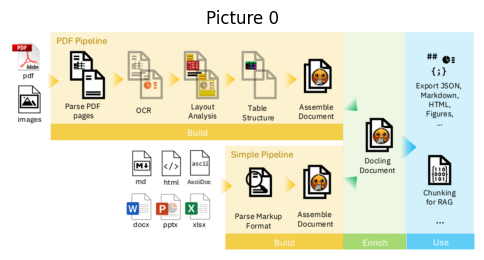


Caption: Figure 1: Sketch of Docling's pipelines and usage model. Both PDF pipeline and simple pipeline build up a DoclingDocument representation, which can be further enriched. Downstream applications can utilize Docling's API to inspect, export, or chunk the document for various purposes.
Location: Page 2

Embedded text elements:
    - Figure 1: Sketch of Docling's pipelines and usage model. Both PDF pipeline and simple pipeline build up a DoclingDocument representation, which can be further enriched. Downstream applications can utilize Docling's API to inspect, export, or chunk the document for various purposes.
    - </>
    - Simple Pipeline
    - Parse Markup
    - Format
    - Build
    - Enrich
    - PDF Pipeline
    - Assemble
    - Document
    - Layout
    - Analysis
    - Parse PDF
    - pages
    - Table
    - Structure
    - OCR
    - Use
    - Build
    - Assemble
    - Document
    - Export JSON,
    - Markdown,
    - HTML,
    - Figures,
    - …
    - {;}
    - ##
   

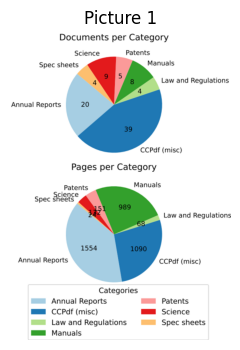


Caption: Figure 2: Dataset categories and sample counts for documents and pages.
Location: Page 5

Embedded text elements:
    - Figure 2: Dataset categories and sample counts for documents and pages.
    - Annual Reports
    - 20
    - CCPdf (misc)
    - 39
    - Law and Regulations
    - 4
    - Manuals
    - 8
    - Patents
    - 5
    - Science
    - 9
    - Spec sheets
    - 4
    - Documents per Category
    - Annual Reports
    - 1554
    - CCPdf (misc)
    - 1090
    - Law and Regulations
    - 68
    - Manuals
    - 989
    - Patents
    - 151
    - Science
    - 132
    - Spec sheets
    - 24
    - Pages per Category
    - Categories
    - Annual Reports
    - CCPdf (misc)
    - Law and Regulations
    - Manuals
    - Patents
    - Science
    - Spec sheets

Picture 2


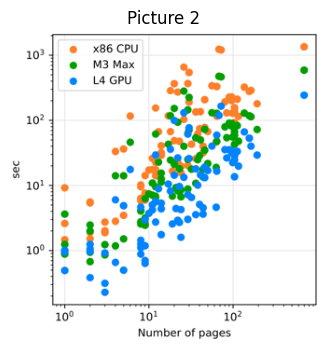


Caption: Figure 3: Distribution of conversion times for all documents, ordered by number of pages in a document, on all system configurations. Every dot represents one document. Log/log scale is used to even the spacing, since both number of pages and conversion times have long-tail distributions.
Location: Page 5

Embedded text elements:
    - Figure 3: Distribution of conversion times for all documents, ordered by number of pages in a document, on all system configurations. Every dot represents one document. Log/log scale is used to even the spacing, since both number of pages and conversion times have long-tail distributions.
    - 10 0
    - 10 1
    - 10 2
    - Number of pages
    - 10 0
    - 10 1
    - 10 2
    - 10 3
    - sec
    - x86 CPU
    - M3 Max
    - L4 GPU

Picture 3


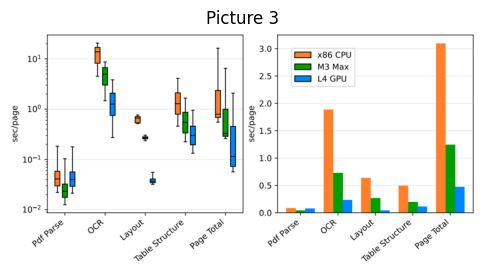


Caption: Figure 4: Contributions of PDF backend and AI models to the conversion time of a page (in seconds per page). Lower is better. Left: Ranges of time contributions for each model to pages it was applied on (i.e., OCR was applied only on pages with bitmaps, table structure was applied only on pages with tables). Right: Average time contribution to a page in the benchmark dataset (factoring in zero-time contribution for OCR and table structure models on pages without bitmaps or tables) .
Location: Page 7

Embedded text elements:
    - Figure 4: Contributions of PDF backend and AI models to the conversion time of a page (in seconds per page). Lower is better. Left: Ranges of time contributions for each model to pages it was applied on (i.e., OCR was applied only on pages with bitmaps, table structure was applied only on pages with tables). Right: Average time contribution to a page in the benchmark dataset (factoring in zero-time contribution for OCR and table structure models on p

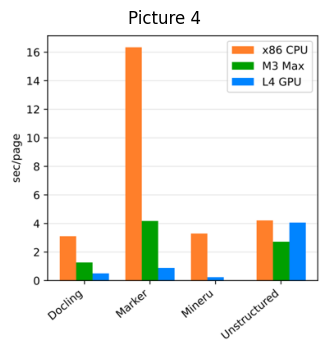


Caption: Figure 5: Conversion time in seconds per page on our dataset in three scenarios, across all assets and system configurations. Lower bars are better. The configuration includes OCR and table structure recognition ( fast table option on Docling and MinerU, hi res in unstructured, as shown in table 1).
Location: Page 7

Embedded text elements:
    - Figure 5: Conversion time in seconds per page on our dataset in three scenarios, across all assets and system configurations. Lower bars are better. The configuration includes OCR and table structure recognition ( fast table option on Docling and MinerU, hi res in unstructured, as shown in table 1).
    - Docling
    - Marker
    - Mineru
    - Unstructured
    - 0
    - 2
    - 4
    - 6
    - 8
    - 10
    - 12
    - 14
    - 16
    - sec/page
    - x86 CPU
    - M3 Max
    - L4 GPU

Picture 5


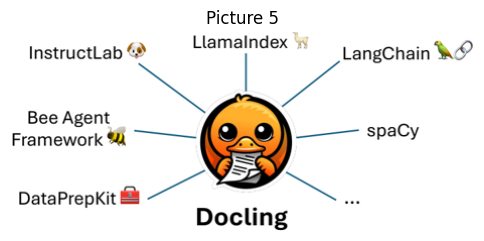


Caption: Figure 6: Ecosystem of Docling integrations contributed by the Docling team or the broader community. Docling is already used for RAG, model fine-tuning, large-scale datasets creation, information extraction and agentic workflows.
Location: Page 7

Embedded text elements:
    - Figure 6: Ecosystem of Docling integrations contributed by the Docling team or the broader community. Docling is already used for RAG, model fine-tuning, large-scale datasets creation, information extraction and agentic workflows.
    - Docling
    - InstructLab
    - 🐶
    - Bee Agent
    - Framework
    - 🐝
    - LlamaIndex
    - 🦙
    - LangChain
    - 🦜🔗
    - …
    - DataPrepKit
    - 🧰
    - spaCy


In [14]:
def inspect_pictures_with_images(doc: DoclingDocument, image_size=(6, 4)):
    """Display pictures inline with their text content"""
    for idx, picture in enumerate(doc.pictures):
        print(f"\n{'='*60}")
        print(f"Picture {idx}")
        print(f"{'='*60}")

        # Display the image
        try:
            img = picture.get_image(doc)
            if img:
                plt.figure(figsize=image_size)
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"Picture {idx}")
                plt.show()
        except Exception as e:
            print(f"Could not display image: {e}")

        # Display metadata
        caption = picture.caption_text(doc)
        if caption:
            print(f"\nCaption: {caption}")

        if hasattr(picture, 'prov') and picture.prov:
            print(f"Location: Page {picture.prov[0].page_no}")

        # Display embedded text
        print("\nEmbedded text elements:")
        text_found = False
        for item, level in doc.iterate_items(root=picture, traverse_pictures=True):
            if isinstance(item, TextItem):
                print(f"{'  ' * (level + 1)}- {item.text}")
                text_found = True

        if not text_found:
            print("  (No text elements found)")

# Use the simple inline display
inspect_pictures_with_images(img_doc)

### Visualizing Document Layout with Bounding Boxes

In order to understand how each part of the document is extracted, let's visualize the extracted elements.

We can do that by using one of Docling's built-in visualizers:

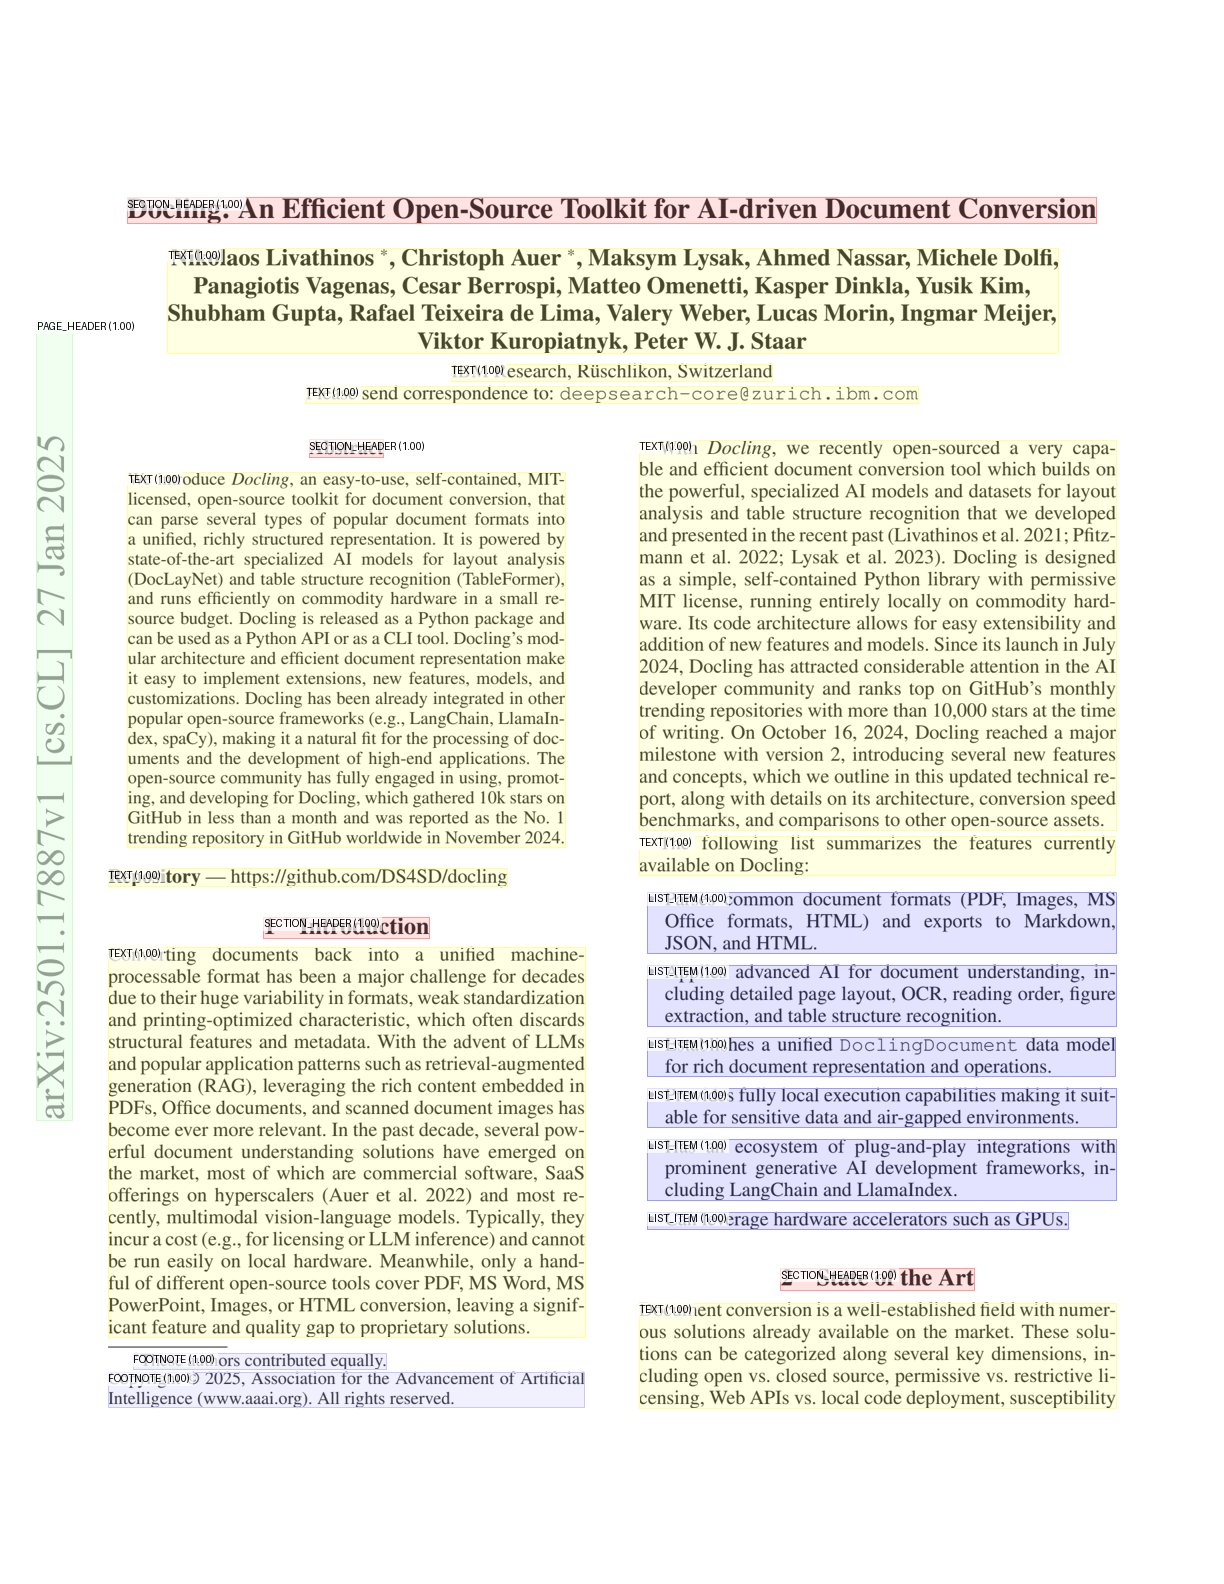

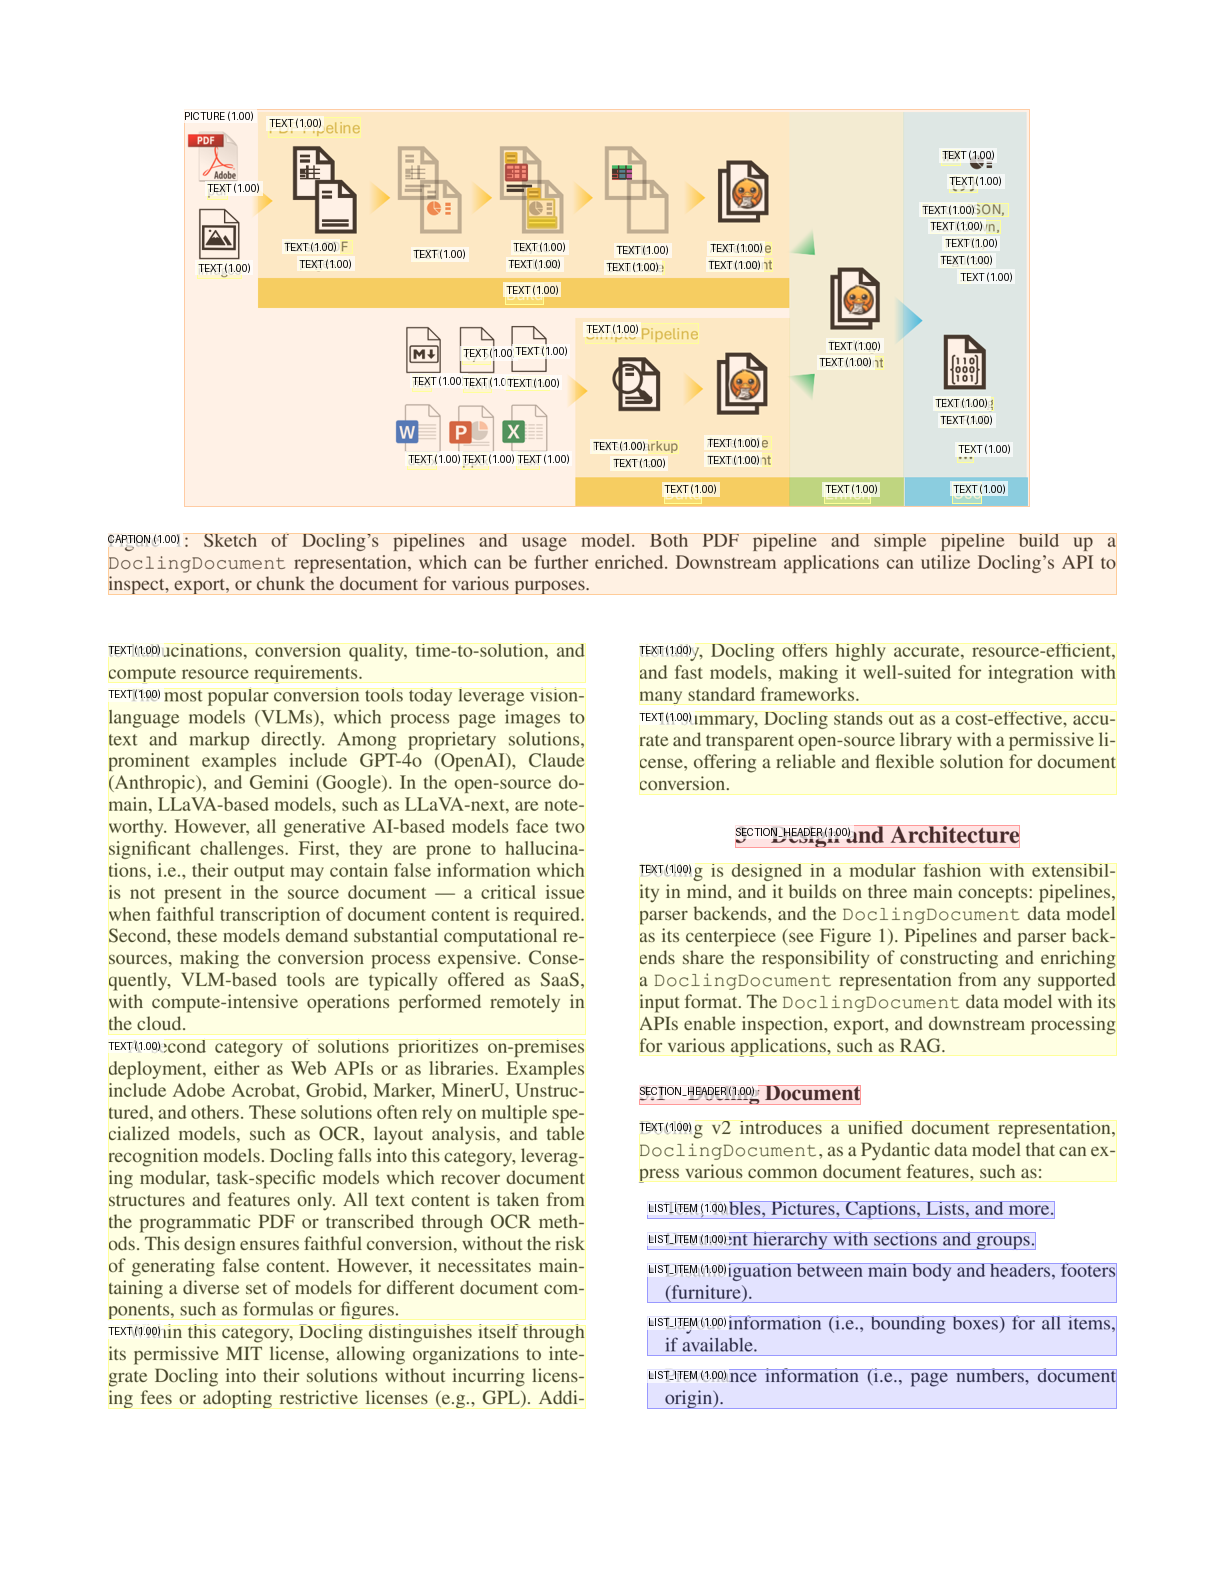

In [15]:
from docling_core.transforms.visualizer.layout_visualizer import LayoutVisualizer

layout_visualizer = LayoutVisualizer()
page_images = layout_visualizer.get_visualization(doc=img_doc)

num_pages_to_viz = 2  # first N pages to visualize
pages_to_viz = list(page_images.keys())[:num_pages_to_viz]
for page in pages_to_viz:
    display(page_images[page])

## 3. Advanced Features: Enrichment


### Picture Classification and Description

Beyond basic captioning capabilities, Docling is also able to process images using multimodal LLMs. This will give us more indepth picture descriptions to help us leverage image data more effectively.

Let's try this with the integrated granite-vision model which is invoked via the watsonx.ai connection which was initialized earlier.

In [16]:
from docling.datamodel.pipeline_options import PictureDescriptionApiOptions

# Configure enrichment pipeline
VLM_MODEL_NAME="granite-vision-3.2-2b"
enrichment_options = PdfPipelineOptions(
    do_picture_description=True,
    enable_remote_services=True,
    picture_description_options=PictureDescriptionApiOptions(
        url="http://localhost:4000/chat/completions",
        params=dict(
            model=VLM_MODEL_NAME,
            seed=42,
            max_tokens=400,
            provenance=VLM_MODEL_NAME,
        ),
        prompt="Give a detailed description of what is depicted in the image",
        concurrency=4,
        timeout=90,
    ),
    generate_picture_images=True,
    images_scale=1.0,
)

converter_enriched = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=enrichment_options)
    }
)

enr_result = converter_enriched.convert(docling_paper)
enr_doc = enr_result.document

2025-09-25 19:05:44,437 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-09-25 19:05:44,440 - INFO - Going to convert document batch...
2025-09-25 19:05:44,440 - INFO - Initializing pipeline for StandardPdfPipeline with options hash 133c3c683f93228e1990482786a8662a
2025-09-25 19:05:44,441 - INFO - Accelerator device: 'mps'
2025-09-25 19:05:46,463 - INFO - Accelerator device: 'mps'
2025-09-25 19:05:47,247 - INFO - Accelerator device: 'mps'
2025-09-25 19:05:47,604 - INFO - Processing document 2501.17887v1.pdf
2025-09-25 19:05:56,026 - INFO - Finished converting document 2501.17887v1.pdf in 11.91 sec.



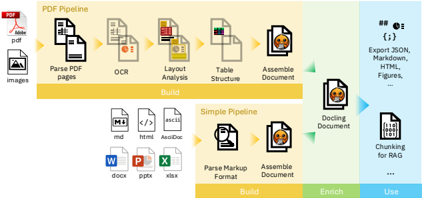
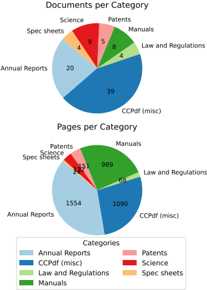
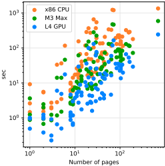
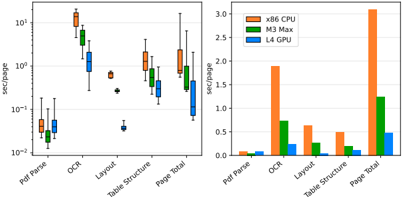
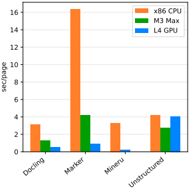

In [17]:
from docling_core.types.doc.document import PictureDescriptionData
from IPython import display

html_buffer = []
# display the first 5 pictures and their captions and annotations:
for pic in enr_doc.pictures[:5]:
    html_item = (
        f"<h3>Picture <code>{pic.self_ref}</code></h3>"
        f'<img src="{pic.image.uri!s}" /><br />'
        f"<h4>Caption</h4>{pic.caption_text(doc=doc)}<br />"
    )
    for annotation in pic.annotations:
        if not isinstance(annotation, PictureDescriptionData):
            continue
        html_item += (
            f"<h4>Annotations ({VLM_MODEL_NAME})</h4>{annotation.text}<br />\n"
        )
    html_buffer.append(html_item)
display.HTML("<hr />".join(html_buffer))

## Summary

### What You've Accomplished in Lab 1

Congratulations! You've mastered the critical first step in document AI:

- Basic and advanced document conversion with visual feedback
- Multiple export formats with visualization options
- Table and image extraction with visual verification
- Enrichment models and VLMs

For more information:
- GitHub: https://github.com/docling-project/docling
- Documentation: https://docling-project.github.io/docling/
- Technical Report: https://arxiv.org/abs/2408.09869
- Examples: https://github.com/docling-project/docling/tree/main/examples